In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Tekion - Data Science case study/accidents (1).csv')

In [4]:
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [5]:
df.shape

(3513617, 49)

Above dataset has more than 3.5 lakhs datapoints and 49 columns. Let's Explore which all columns can be used as a feature for building our model to predict the Severity

# Get the details about the columns present

In [6]:
df.dtypes

ID                        object
Source                    object
TMC                      float64
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Number                   float64
Street                    object
Side                      object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitat

In [7]:
def plot_values(data, figsize, title, plot_type, xlabel, ylabel):
    plt.figure(figsize=figsize)
    plt.title(title)
    data.plot(kind=plot_type)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show() 

In [8]:
state_counts = df["State"].value_counts()

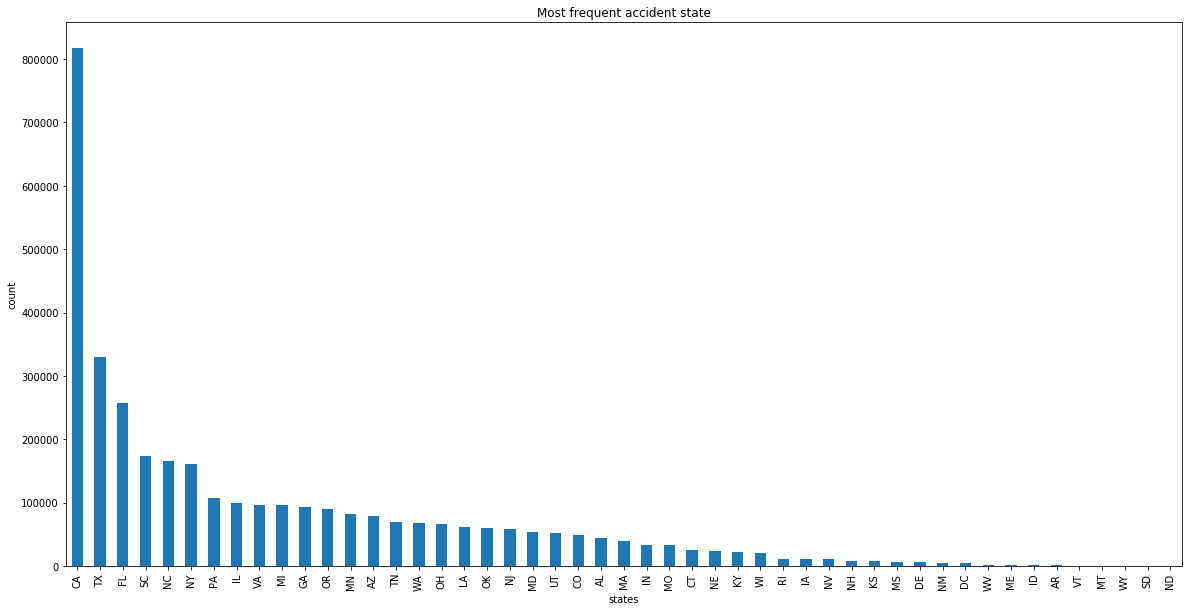

In [9]:
plot_values(state_counts, (20,10), "Most frequent accident state", "bar", "states", "count")

As evident from above plot, the state of "CA" has most of the accidents 

# Class imbalanced data : Get the target  variable distribution

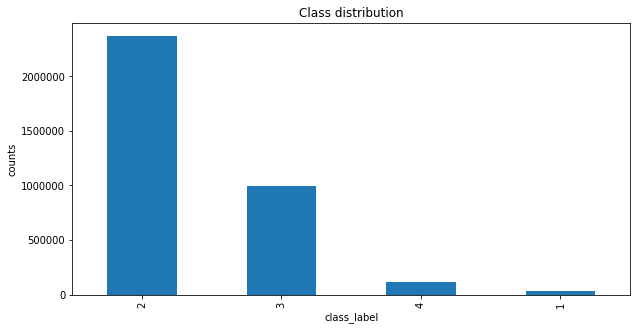

In [10]:
severity_dist = df["Severity"].value_counts()
plot_values(severity_dist, (10,5), "Class distribution", "bar", "class_label", "counts")

"Class Imbalanced dataset" : As evident from above plot, class 2 is present in abundant is the supplied data while class 1 has the least presene

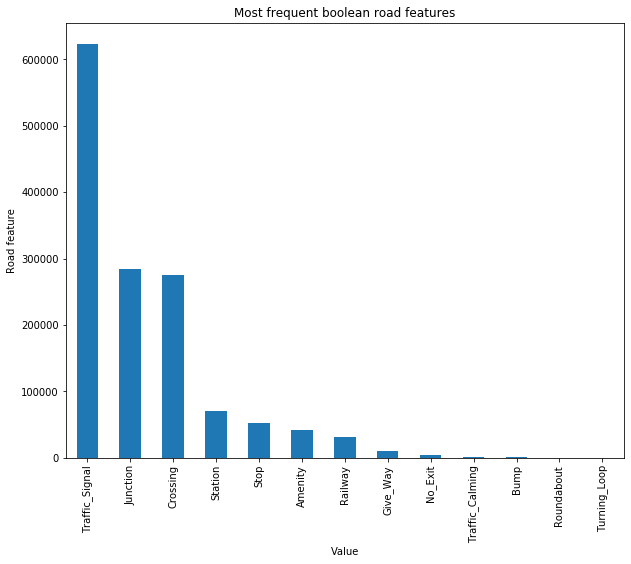

In [11]:
boolean_columns = ["Amenity", "Bump", "Crossing", "Give_Way", "Junction", "No_Exit", "Railway", "Roundabout", "Station", "Stop", "Traffic_Calming", "Traffic_Signal", "Turning_Loop"]
road_features_data = df[boolean_columns].sum().sort_values(ascending=False)
plot_values(road_features_data, (10, 8), "Most frequent boolean road features", "bar", "Value", "Road feature")

In [12]:
from nltk.corpus import stopwords


In [13]:
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [14]:
state_counts = df["Timezone"].value_counts()

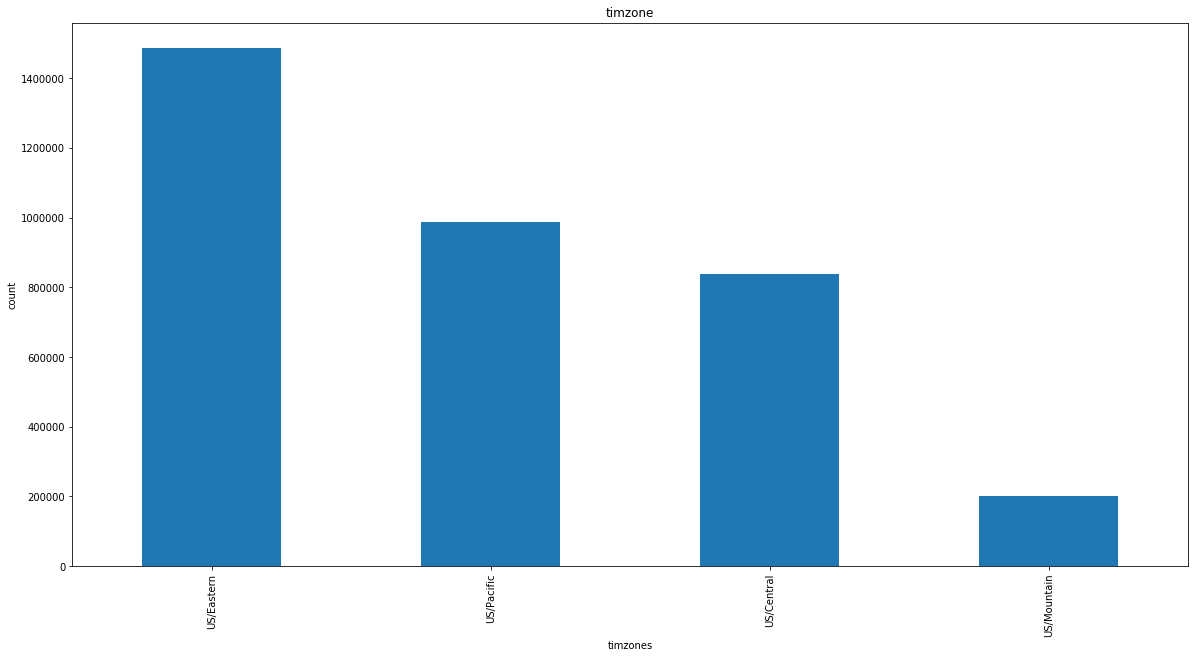

In [15]:
plot_values(state_counts, (20,10), "timzone", "bar", "timzones", "count")

In [ ]:
'''
Step 1:
# Try to plot the Correlation among the features :
# The ways could be :
1. one variable on x axis and another on y and visually analyse whether could fit a line to find positive or negative correlation.
2. Another could be to use the correlation matrix library to see the heatmaps of correlation values.
3. Third method could be to use KL divergence to actually see how correlated two features are.
'''

'''
Step 2:
Once we have found the correlation, then reduce the variables which are highly correlated with one more informative variable which is having much more frequent occurence using bar plots of frequency counts.

'''


'''
Step 3:
Remove redundant features as well like ID, source, country, Weather timestamp--> Drop these columns from dataframe.
'''

'''
step 4 : 
Try to use the desciption column as well. To do so break the description words (nltk tekienize, stem/lemmatize) and try to plot the frequency of the words against each of the severity classes.
Presence of some of the words specify a particular severity class. For eg : "Exit" word is mostly associated with class 3. "Delay" word is mostly associated with class 2 and so on.
'''

'''
step 5 :
Treating missing values in some of the features :
1. Some of the columns are having empty or NAN values in them. So Apply missing values filling techniques to fill the missing data.
Other things could be drop such data points which has lot of these missing values.

Some such columns are : precipitation, temperature,
'''

'''
step 6: 
Explore the features on side, city, county, state, Airport code. If county has direct relations with state then they both could be merged into one column.
Same goes with airport code.

'''


In [ ]:
F1 micro = TP 

Precision class_1 = TP class 1 / (TP class 1 + FP all other classes)
precision class 2 = TP class 2 / (TP class 2 + FP all other classes)
precision class 3 = TP class 3 / (TP class 3 + FP all other classes)
precision class 4 = TP class 4 / (TP class 4 + FP all other classes)
reall _calss 1 = TP class 1 / (TP + FN)
reall class2 

should i just write?
